# PART  -  1/3 : FOR MDA  :-

In [1]:
#importing libraries

from selenium import webdriver
from bs4 import BeautifulSoup
import chromedriver_binary
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from time import sleep
from nltk import word_tokenize
from nltk.corpus import stopwords
% matplotlib inline

In [2]:
df_mda = pd.read_csv(r'cik_list_update_adjusted.csv')
df_mda.columns

Index(['CIK', 'CONAME', 'FYRMO', 'FDATE', 'FORM', 'SECFNAME',
       'mda_positive_score', 'mda_negative_score', 'mda_polarity_score',
       'mda_average_sentence_length', 'mda_percentage_of_complex_words',
       'mda_fog_index', 'mda_complex_word_count', 'mda_word_count',
       'mda_uncertainty_score', 'mda_constraining_score',
       'mda_positive_word_proportion', 'mda_negative_word_proportion',
       'mda_uncertainty_word_proportion', 'mda_constraining_word_proportion',
       'qqdmr_positive_score', 'qqdmr_negative_score', 'qqdmr_polarity_score',
       'qqdmr_average_sentence_length', 'qqdmr_percentage_of_complex_words',
       'qqdmr_fog_index', 'qqdmr_complex_word_count', 'qqdmr_word_count',
       'qqdmr_uncertainty_score', 'qqdmr_constraining_score',
       'qqdmr_positive_word_proportion', 'qqdmr_negative_word_proportion',
       'qqdmr_uncertainty_word_proportion',
       'qqdmr_constraining_word_proportion', 'rf_positive_score',
       'rf_negative_score', 'rf_polarity

### calculate the mda_positive_score :

In [3]:
def mda_positive_score_fn(super_final_content_extract_mda_list_with_stopwords_removed, positive_words):
    no_of_positive_words = 0
    for i in range(0, len(super_final_content_extract_mda_list_with_stopwords_removed)):
        if super_final_content_extract_mda_list_with_stopwords_removed[i] in positive_words:
            no_of_positive_words += 1
            
    return no_of_positive_words

### calculate the mda_negative_score :

In [4]:
def mda_negative_score_fn(super_final_content_extract_mda_list_with_stopwords_removed, negative_words):
    no_of_negative_words = 0
    for i in range(0, len(super_final_content_extract_mda_list_with_stopwords_removed)):
        if super_final_content_extract_mda_list_with_stopwords_removed[i] in negative_words:
            no_of_negative_words += 1
    
    return no_of_negative_words

### calculate the mda_polarity_score :

In [5]:
def mda_polarity_score_fn(super_final_content_extract_mda_list_with_stopwords_removed, mda_positive_score, mda_negative_score):
    num = (mda_positive_score - mda_negative_score)
    den = ((mda_positive_score + mda_negative_score) + 0.000001)
    mda_polarity_score = num/den
    return mda_polarity_score

### calculate the mda_average_sentence_length :

In [6]:
def mda_average_sentence_length_fn(no_of_sentences, super_final_content_extract_mda_list_with_stopwords_removed):
    return (len(super_final_content_extract_mda_list_with_stopwords_removed)/no_of_sentences)
    

### calculate the mda_uncertainity_score :

In [7]:
def mda_uncertainty_score_fn(super_final_content_extract_mda_list_with_stopwords_removed):
    no_of_uncertain_words = 0
    for i in range(0, len(super_final_content_extract_mda_list_with_stopwords_removed)):
        if super_final_content_extract_mda_list_with_stopwords_removed[i] in uncertain_words:
            no_of_uncertain_words += 1
            
    return (no_of_uncertain_words)

### calculate the mda_constraining_score :

In [8]:
def mda_constraining_score_fn(super_final_content_extract_mda_list_with_stopwords_removed):
    no_of_constrain_words = 0
    for i in range(0, len(super_final_content_extract_mda_list_with_stopwords_removed)):
        if super_final_content_extract_mda_list_with_stopwords_removed[i] in constrain_words:
            no_of_constrain_words += 1
            
    return (no_of_constrain_words)

### calculate the mda_complex_word_count :

In [9]:
def mda_complex_word_count_fn(super_final_content_extract_mda_list_with_stopwords_removed):
    vowels = ['a','e','i','o','u']

    complex_word_count = 0
    for i in range(0, len(super_final_content_extract_mda_list_with_stopwords_removed)):
        count_syllable = 0
        current_word = super_final_content_extract_mda_list_with_stopwords_removed[i]
        for letter in current_word:
            if letter in vowels:
                count_syllable += 1
            if count_syllable > 2:
#                 print(word," is complex word")
                complex_word_count += 1
                break
        
    return complex_word_count

#     print("complex word count is ", complex_word_count)

## Importing the uncertainity words list :

In [10]:
uncertain = pd.read_csv(r'uncertainty_dictionary.csv')
uncertain.head()

,Word
0,ABEYANCE
1,ABEYANCES
2,ALMOST
3,ALTERATION
4,ALTERATIONS


In [11]:
uncertain['Word'].dropna(axis='rows',inplace=True)

In [12]:
len(uncertain['Word'])

297

In [13]:
uncertain_words = list(uncertain['Word'])
for i in range(0, len(uncertain_words)):
    uncertain_words[i] = uncertain_words[i].lower()

## Importing the constraining words list :

In [14]:
constrain = pd.read_csv(r'constraining_dictionary.csv')
constrain.head()

,Word
0,ABIDE
1,ABIDING
2,BOUND
3,BOUNDED
4,COMMIT


In [15]:
constrain['Word'].dropna(axis='rows',inplace=True)

In [16]:
len(constrain['Word'])

184

In [17]:
constrain_words = list(constrain['Word'])
for i in range(0, len(constrain_words)):
    constrain_words[i] = constrain_words[i].lower()

###    Importing the +ve/-ve words csv file and making a list out of that :

In [18]:
pos_neg = pd.read_csv(r'positive_negative_words.csv')

In [19]:
pos_neg['positive'].dropna(axis='rows',inplace=True)

In [20]:
len(pos_neg['positive'])

354

In [21]:
pos_neg['negative'].dropna(axis='rows',inplace=True)

In [22]:
len(pos_neg['negative'])

2348

In [23]:
positive_words = list(pos_neg['positive'].astype('str'))
negative_words = list(pos_neg['negative'].astype('str'))

In [24]:
for i in range(0, len(positive_words)):
    positive_words[i] = positive_words[i].lower()

In [25]:
for i in range(0, len(negative_words)):
    negative_words[i] = negative_words[i].lower()

### Function to tokenize list and remove stop words :

In [26]:
def nltk_tokenizing(super_final_content_extract_mda):
    # complete calculations
    
    from nltk import word_tokenize
    from nltk.corpus import stopwords
    stopwords_list = set(stopwords.words('english'))
    super_final_content_extract_mda_list = super_final_content_extract_mda.split()
   
    # converting to lower case each element of the list
    
    for i in range(0,len(super_final_content_extract_mda_list)):
        super_final_content_extract_mda_list[i] = super_final_content_extract_mda_list[i].lower() 
    
    super_final_content_extract_mda_list_with_stopwords_removed = []    
    
    # creating a new list with the stopwords removed from our original data list :
    
    for j in range(0, len(super_final_content_extract_mda_list)):
        if super_final_content_extract_mda_list[j] in stopwords_list:
            continue
        else:
            super_final_content_extract_mda_list_with_stopwords_removed.append(super_final_content_extract_mda_list[j])
    
    return super_final_content_extract_mda_list_with_stopwords_removed

    # returning the list with stop words removed, punctuation already removed and each letternow lowercase
    
    

    

### Function to calculate no of sentences : 

In [27]:
def calculate_no_of_sentences(final_content_extract_mda):
    dots = re.findall(r'\w\.\s{0,1}\w{1,1}', str(final_content_extract_mda))
    return (len(dots) + 1) 

### Function to remove punctuation :

In [28]:
# from string import punctuation
def strip_punctuation(final_content_extract_mda):
    return ''.join(c for c in final_content_extract_mda if c not in punctuation)

### Function for cleaning for entire report and finding the no of constraining words for the whole report :

In [29]:
def entire_report_constraining_words(page_source):
    report_whole = str(page_source)
    report_whole = report_whole.split()            # into list
    report_whole = ' '.join(report_whole)          # into string again
    report_whole = ''.join(c for c in report_whole if c not in punctuation) # punctuation removed
   
    remove_numeric_digits_from_whole_report = ''      # removing numeric digits
    for each_letter in  report_whole:
        if each_letter.isdigit()==False:
            remove_numeric_digits_from_whole_report = remove_numeric_digits_from_whole_report + each_letter
            
    report_whole = remove_numeric_digits_from_whole_report.split()   # into list
    report_whole = ' '.join(report_whole) # into string again
    
    list_of_all_report_words = report_whole.split()
    
    stopwords_list = set(stopwords.words('english'))
    
    # converting to lower case each element of the list
    
    for i in range(0, len(list_of_all_report_words)):    # converting into lowercase each list item
        list_of_all_report_words[i] = list_of_all_report_words[i].lower() 
    
    list_of_all_report_words_with_stopwords_removed = []    
    
    # creating a new list with the stopwords removed from our original data list :
    
    for j in range(0, len(list_of_all_report_words)):          # removing the stopwords
        if list_of_all_report_words[j] in stopwords_list:
            continue
        else:
            list_of_all_report_words_with_stopwords_removed.append(list_of_all_report_words[j])
            
    no_of_constrain_words_in_entire_report = 0       # counting the no of constraining words
    for i in range(0, len(list_of_all_report_words_with_stopwords_removed)):
        if list_of_all_report_words_with_stopwords_removed[i] in constrain_words:
            no_of_constrain_words_in_entire_report += 1
            
    return (no_of_constrain_words_in_entire_report)
    

# MAIN COMPUTATIONAL CELL :

In [30]:

for i in range(0, len(df_mda)):   
    driver = webdriver.Chrome()
    secfname = df_mda.ix[i, 'SECFNAME']
    
    
    driver.get(secfname)
    
    print(secfname)
    sleep(1)
    
    page_source = driver.page_source
    page_source = str(page_source)
    
    driver.close()
    driver.quit()
    
    # cleaning the page_source:
    
    page_source = page_source.replace('\n', ' ')
    page_source = page_source.replace('\t', ' ')
    page_source = page_source.split()
    page_source = ' '.join(page_source)
    
    # setting mark for <Page>

    page_source = page_source.replace('&lt;PAGE&gt;', '<Page>')
    page_source = page_source.replace('&lt;Page&gt;', '<Page>')
    
    
    # finding the no of constraining words in the entire report : 
    df_mda.ix[i, 'constraining_words_whole_report'] = entire_report_constraining_words(page_source)
    
    
    try:
   
        # finding the existence for -  Management's Discussion and Analysis : 
        evidence_mda = re.findall(r"Management's Discussion and Analysis of", page_source, re.IGNORECASE)

        # exists or not
        if len(evidence_mda) > 0:
            present_mda = True
        else:
            present_mda = False

        # whether 'mda' exists or not in the entire report:
        print(present_mda,"for ",i," URL " )

        # if 'present_mda'==True, then extracting the 'mda' section via regex:

        if present_mda == True:
            
            # best regex options available :
            
            content_extract_mda_1 = re.findall(r"<Page>\s{0,1}\d{0,2}\s{0,1}Management's Discussion and Analysis of(.*?)\W{0,1}\d\d\W{0,1}\s{0,1}<Page>", page_source, re.IGNORECASE)
            content_extract_mda_2 = re.findall(r"<Page>\s{0,1}\d{0,2}\s{0,1}Item\s{0,2}\d\.\s{0,2}Management's Discussion and Analysis of(.*?)\W{0,1}\d{1,2}\W{0,1}\s{0,1}<Page>", page_source, re.IGNORECASE)
            content_extract_mda_3 = re.findall(r"<Page>\s{0,1}\d{0,2}\s{0,1}Item\s{0,2}\d{0,2}\s{0,1}\W{0,1}\s{0,2}Management's Discussion and Analysis of(.*?)\W{0,1}\d{1,2}\W{0,1}\s{0,1}<Page>", page_source, re.IGNORECASE)
            content_extract_mda_4 = re.findall(r"<Page>\s{0,1}\d{0,2}\s{0,1}Item\s{0,1}\d{0,2}\s{0,1}Management's Discussion and Analysis of(.*?)\s{0,1}\d{0,2}\s{0,1}<Page>", page_source, re.IGNORECASE)
            content_extract_mda_5 = re.findall(r"Item\s{0,1}\d{0,1}\s{0,1}Management's Discussion and Analysis of(.*?)\s{0,1}\d{0,2}\s{0,1}<Page>", page_source, re.IGNORECASE)
            content_extract_mda_6 = re.findall(r"<Page>\s{0,1}\d{0,2}\s{0,1}Item\s{0,1}\d{0,2}\s{0,1}Management's Discussion and Analysis of(.*?)\s{0,1}\W{0,1}\d{0,2}\W{0,1}\s{0,1}<Page>", page_source, re.IGNORECASE)
            
            # setting up finally the extracted 'mda' section obtained:
            final_content_extract_mda = ''

            if (len(content_extract_mda_1) > 0) :
                final_content_extract_mda = content_extract_mda_1
            
            if (len(content_extract_mda_2) > 0)  :
                final_content_extract_mda = content_extract_mda_2
            
            if (len(content_extract_mda_3) > 0)  :
                final_content_extract_mda = content_extract_mda_3
            
            if (len(content_extract_mda_4) > 0)  :
                final_content_extract_mda = content_extract_mda_4
            
            if (len(content_extract_mda_5) > 0) :
                final_content_extract_mda = content_extract_mda_5

            if (len(content_extract_mda_6) > 0) :
                final_content_extract_mda = content_extract_mda_6

            
            # further setting up :

            if (len(final_content_extract_mda[0]) > 1):
                final_content_extract_mda = final_content_extract_mda[0].split()
                final_content_extract_mda = final_content_extract_mda[6:]
                final_content_extract_mda = ' '.join(final_content_extract_mda)
                final_content_extract_mda = str(final_content_extract_mda)

                # calculating the no. of sentences before the removal of punctuation characters:

                no_of_sentences = calculate_no_of_sentences(final_content_extract_mda)
                print("no of sentences", no_of_sentences)
                
                # removing punctuations :

                final_content_extract_mda_punc = strip_punctuation(final_content_extract_mda)

                # removing all numeric digits :

                remove_numeric_mda = ''
                for each_letter in  final_content_extract_mda_punc:
                    if each_letter.isdigit()==False:
                        remove_numeric_mda = remove_numeric_mda + each_letter
                
                
                
                # after removing all the numeric digits and framing properly once again:
                super_final_content_extract_mda = ' '.join(remove_numeric_mda.split())

                # CALLING THE TOKENIZING FUNCTION TO LOWERCASE WORDS AND REMOVE STOPWORDS:
                super_final_content_extract_mda_list_with_stopwords_removed = nltk_tokenizing(super_final_content_extract_mda)
                print("length of super final", len(super_final_content_extract_mda_list_with_stopwords_removed))
                
                # calculating the mda_positive_score - fn :
                mda_positiv
                +e_score = mda_positive_score_fn(super_final_content_extract_mda_list_with_stopwords_removed, positive_words)
                print("mda_positive_score ",mda_positive_score)
                df_mda.ix[i, 'mda_positive_score'] = mda_positive_score
                
                # calculating the mda_negative_score - fn :
                mda_negative_score = mda_negative_score_fn(super_final_content_extract_mda_list_with_stopwords_removed, negative_words)
                print("mda_negative_score ",mda_negative_score)
                df_mda.ix[i, 'mda_negative_score'] = mda_negative_score

                # calculating the mda_polarity score - fn :
                mda_polarity_score = mda_polarity_score_fn(super_final_content_extract_mda_list_with_stopwords_removed, mda_positive_score, mda_negative_score)
                print("mda_polarity_score ",mda_polarity_score)
                df_mda.ix[i, 'mda_polarity_score'] = mda_polarity_score

                # calculating the mda_average sentence length - fn :
                mda_average_sentence_length = mda_average_sentence_length_fn(no_of_sentences, super_final_content_extract_mda_list_with_stopwords_removed)
                print("mda_average_sentence_length ", mda_average_sentence_length)
                df_mda.ix[i, 'mda_average_sentence_length'] = mda_average_sentence_length

                # calculating the mda_word_count :
                mda_word_count = len(super_final_content_extract_mda_list_with_stopwords_removed)
                print("mda_word_count ", mda_word_count)
                df_mda.ix[i, 'mda_word_count'] = mda_word_count

                # calculating the mda_complex_word_count - fn :
                mda_complex_word_count = mda_complex_word_count_fn(super_final_content_extract_mda_list_with_stopwords_removed)
                print("mda_complex_word_count ",mda_complex_word_count)
                df_mda.ix[i, 'mda_complex_word_count'] = mda_complex_word_count

                # calculating the mda_percentage_of_complex_words :
                mda_percentage_of_complex_words = (mda_complex_word_count)/(mda_word_count)
                print("mda_percentage_of_complex_words, ",mda_percentage_of_complex_words)
                df_mda.ix[i, 'mda_percentage_of_complex_words'] = mda_percentage_of_complex_words

                # calculating the mda_fog_index :
                mda_fog_index = 0.4*(mda_average_sentence_length + mda_percentage_of_complex_words)
                print("mda_fog_index ",mda_fog_index)
                df_mda.ix[i, 'mda_fog_index'] = mda_fog_index

                # calculating the mda_uncertainity_score - fn :
                mda_uncertainty_score = mda_uncertainty_score_fn(super_final_content_extract_mda_list_with_stopwords_removed)
                print("mda_uncertainty_score ", mda_uncertainty_score)
                df_mda.ix[i, 'mda_uncertainty_score'] = mda_uncertainty_score

                # calculating the mda_constraining_score - fn :
                mda_constraining_score = mda_constraining_score_fn(super_final_content_extract_mda_list_with_stopwords_removed)
                print("mda_constraining_score ", mda_constraining_score)
                df_mda.ix[i, 'mda_constraining_score'] = mda_constraining_score

                # calculating the mda_positive_word_proportion :
                mda_positive_word_proportion = (mda_positive_score)/(mda_word_count)
                print("mda_positive_word_proportion ",mda_positive_word_proportion)
                df_mda.ix[i, 'mda_positive_word_proportion'] = mda_positive_word_proportion

                # calculating the mda_negative_word_proportion :
                mda_negative_word_proportion = (mda_negative_score)/(mda_word_count)
                print("mda_negative_word_proportion", mda_negative_word_proportion)
                df_mda.ix[i, 'mda_negative_word_proportion'] = mda_negative_word_proportion

                # calculating the mda_uncertainty_word_proportion : 
                mda_uncertainty_word_proportion = (mda_uncertainty_score)/(mda_word_count)
                print("mda_uncertainty_word_proportion ",mda_uncertainty_word_proportion)
                df_mda.ix[i, 'mda_uncertainty_word_proportion'] = mda_uncertainty_word_proportion

                # calculating the mda_constraining_word_proportion :
                mda_constraining_word_proportion = (mda_constraining_score)/(mda_word_count)
                print("mda_constraining_word_proportion",mda_constraining_word_proportion)
                df_mda.ix[i, 'mda_constraining_word_proportion'] = mda_constraining_word_proportion
            
            else:
                continue

        elif present_mda == False:
            continue
            
    except:
        continue
    
    

C:\anaconda5\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


https://www.sec.gov/Archives/edgar/data/3662/0000950170-98-000413.txt
True for  0  URL 
no of sentences 28
length of super final 385
mda_positive_score  5
mda_negative_score  15
mda_polarity_score  -0.4999999750000012
mda_average_sentence_length  13.75
mda_word_count  385
mda_complex_word_count  203
mda_percentage_of_complex_words,  0.5272727272727272
mda_fog_index  5.710909090909091
mda_uncertainty_score  5
mda_constraining_score  0
mda_positive_word_proportion  0.012987012987012988
mda_negative_word_proportion 0.03896103896103896
mda_uncertainty_word_proportion  0.012987012987012988
mda_constraining_word_proportion 0.0
https://www.sec.gov/Archives/edgar/data/3662/0000950170-98-001001.txt
True for  1  URL 
no of sentences 34
length of super final 419
mda_positive_score  3
mda_negative_score  26
mda_polarity_score  -0.7931034209274682
mda_average_sentence_length  12.323529411764707
mda_word_count  419
mda_complex_word_count  229
mda_percentage_of_complex_words,  0.5465393794749404
mda_

https://www.sec.gov/Archives/edgar/data/3662/0000950172-99-001626.txt
False for  17  URL 
https://www.sec.gov/Archives/edgar/data/3662/0000950170-99-001856.txt
True for  18  URL 
no of sentences 845
length of super final 10643
mda_positive_score  116
mda_negative_score  462
mda_polarity_score  -0.5986159159193496
mda_average_sentence_length  12.595266272189349
mda_word_count  10643
mda_complex_word_count  6189
mda_percentage_of_complex_words,  0.581508973033919
mda_fog_index  5.270710098089308
mda_uncertainty_score  283
mda_constraining_score  95
mda_positive_word_proportion  0.010899182561307902
mda_negative_word_proportion 0.0434088133045194
mda_uncertainty_word_proportion  0.026590247110777038
mda_constraining_word_proportion 0.008926054683829747
https://www.sec.gov/Archives/edgar/data/3982/0000950129-06-002926.txt
False for  19  URL 
https://www.sec.gov/Archives/edgar/data/3982/0000950129-06-004690.txt
False for  20  URL 
https://www.sec.gov/Archives/edgar/data/3982/0000950129-06-0

https://www.sec.gov/Archives/edgar/data/4457/0000004457-01-500083.txt
True for  52  URL 
no of sentences 344
length of super final 1959
mda_positive_score  9
mda_negative_score  45
mda_polarity_score  -0.6666666543209879
mda_average_sentence_length  5.694767441860465
mda_word_count  1959
mda_complex_word_count  1227
mda_percentage_of_complex_words,  0.6263399693721287
mda_fog_index  2.528442964493038
mda_uncertainty_score  29
mda_constraining_score  7
mda_positive_word_proportion  0.004594180704441042
mda_negative_word_proportion 0.022970903522205207
mda_uncertainty_word_proportion  0.014803471158754467
mda_constraining_word_proportion 0.0035732516590096988
https://www.sec.gov/Archives/edgar/data/4515/0000004515-08-000073.txt
True for  53  URL 
https://www.sec.gov/Archives/edgar/data/4515/0000004515-09-000008.txt
True for  54  URL 
https://www.sec.gov/Archives/edgar/data/4515/0000004515-09-000018.txt
True for  55  URL 
https://www.sec.gov/Archives/edgar/data/4515/0000004515-09-000029.t

https://www.sec.gov/Archives/edgar/data/5907/0000005907-00-000038.txt
True for  80  URL 
no of sentences 45
length of super final 674
mda_positive_score  4
mda_negative_score  5
mda_polarity_score  -0.11111109876543349
mda_average_sentence_length  14.977777777777778
mda_word_count  674
mda_complex_word_count  380
mda_percentage_of_complex_words,  0.5637982195845698
mda_fog_index  6.21663039894494
mda_uncertainty_score  10
mda_constraining_score  1
mda_positive_word_proportion  0.005934718100890208
mda_negative_word_proportion 0.00741839762611276
mda_uncertainty_word_proportion  0.01483679525222552
mda_constraining_word_proportion 0.001483679525222552
https://www.sec.gov/Archives/edgar/data/5907/0000005907-01-000002.txt
False for  81  URL 
https://www.sec.gov/Archives/edgar/data/5907/0000005907-01-000012.txt
True for  82  URL 
no of sentences 568
length of super final 6048
mda_positive_score  102
mda_negative_score  193
mda_polarity_score  -0.3084745752255099
mda_average_sentence_length

https://www.sec.gov/Archives/edgar/data/6201/0000006201-00-000017.txt
True for  101  URL 
no of sentences 73
length of super final 411
mda_positive_score  8
mda_negative_score  5
mda_polarity_score  0.23076921301775286
mda_average_sentence_length  5.63013698630137
mda_word_count  411
mda_complex_word_count  235
mda_percentage_of_complex_words,  0.5717761557177615
mda_fog_index  2.4807652568076524
mda_uncertainty_score  4
mda_constraining_score  0
mda_positive_word_proportion  0.019464720194647202
mda_negative_word_proportion 0.012165450121654502
mda_uncertainty_word_proportion  0.009732360097323601
mda_constraining_word_proportion 0.0
https://www.sec.gov/Archives/edgar/data/6201/0000950134-01-002483.txt
True for  102  URL 
no of sentences 48
length of super final 392
mda_positive_score  10
mda_negative_score  10
mda_polarity_score  0.0
mda_average_sentence_length  8.166666666666666
mda_word_count  392
mda_complex_word_count  217
mda_percentage_of_complex_words,  0.5535714285714286
mda_

https://www.sec.gov/Archives/edgar/data/6201/0000006201-08-000060.txt
True for  116  URL 
https://www.sec.gov/Archives/edgar/data/6201/0000006201-09-000009.txt
True for  117  URL 
https://www.sec.gov/Archives/edgar/data/6201/0000006201-09-000016.txt
True for  118  URL 
https://www.sec.gov/Archives/edgar/data/6201/0000006201-09-000029.txt
True for  119  URL 
https://www.sec.gov/Archives/edgar/data/6201/0000006201-09-000038.txt
True for  120  URL 
https://www.sec.gov/Archives/edgar/data/6201/0000006201-09-000040.txt
False for  121  URL 
https://www.sec.gov/Archives/edgar/data/6201/0000006201-10-000006.txt
True for  122  URL 
https://www.sec.gov/Archives/edgar/data/6201/0000006201-10-000013.txt
True for  123  URL 
https://www.sec.gov/Archives/edgar/data/6201/0000950123-10-066894.txt
False for  124  URL 
https://www.sec.gov/Archives/edgar/data/6201/0000950123-10-094605.txt
False for  125  URL 
https://www.sec.gov/Archives/edgar/data/6260/0000006260-94-000014.txt
True for  126  URL 
https:/

False for  144  URL 
https://www.sec.gov/Archives/edgar/data/11860/0000011860-00-000028.txt
True for  145  URL 
https://www.sec.gov/Archives/edgar/data/11860/0000011860-00-000038.txt
True for  146  URL 
https://www.sec.gov/Archives/edgar/data/12239/0001104659-07-024804.txt
False for  147  URL 
https://www.sec.gov/Archives/edgar/data/12239/0001104659-07-040463.txt
False for  148  URL 
https://www.sec.gov/Archives/edgar/data/12239/0001104659-07-041441.txt
False for  149  URL 
https://www.sec.gov/Archives/edgar/data/12239/0001104659-07-042333.txt
False for  150  URL 
https://www.sec.gov/Archives/edgar/data/12239/0001104659-07-062470.txt
False for  151  URL 


# OUTPUT CSV - for MDA only :  

In [31]:
df_mda.to_csv(r'result_for_mda.csv',index=False)

## Visualizing the null/empty parts of the latest obtained dataFrame : 

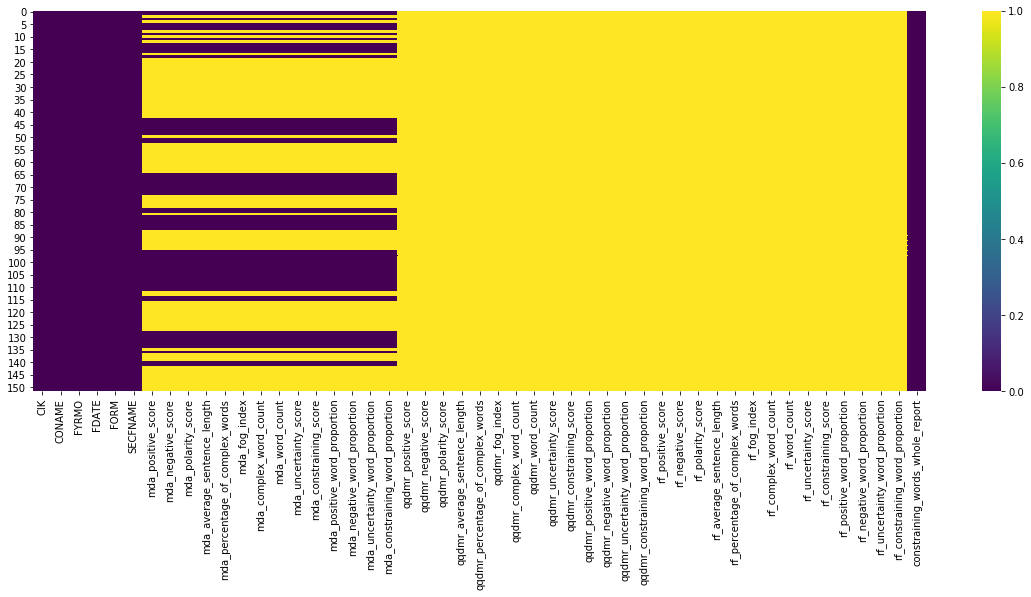

In [34]:
plt.figure(figsize=(20,7))
sns.heatmap(df_mda.isnull(),cmap='viridis')